In [24]:
import numpy as np
import pandas as pd
import scipy.io as sio   ## for loading octave matlab file
import math
from scipy.special import expit #Vectorized sigmoid function
import matplotlib.pyplot as plt

In [25]:
mat_contents = sio.loadmat(r"C:\Users\user\Documents\Machine learning\machine-learning-ex3\ex3\ex3data1.mat")
# training data stored in arrays X, y
X=mat_contents['X']
y=mat_contents['y']          #### taking out X and y from the matrix

m=len(X)


theta_contents = sio.loadmat(r"C:\Users\user\Documents\Machine learning\machine-learning-ex3\ex3\ex3weights.mat")
theta1=theta_contents['Theta1']
theta2=theta_contents['Theta2']



In [26]:
 ####  Setup the parameters you will use for this exercise
input_layer_size  = 400;  ###%    20x20 Input Images of Digits
hidden_layer_size = 25;   ####%   25 hidden units
num_labels = 10;          ###%    10 labels, from 1 to 10   
                          ##     % (note that we have mapped "0" to label 10)\
m=len(X)

####% Randomly select 100 data points to display


sel = np.random.choice(X.shape[0], size=100, replace=False)
selected_X=X[sel]


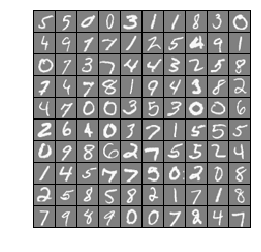

In [27]:
##  FUNCTION TO DISPLAY DATA This function maps each row to a 20 pixel by 20 pixel grayscale image and 
##  displays the images together
def displayData(X, example_width=None):
    # closes previously opened figure. preventing a
    # warning after opening too many figures
    plt.close()

# creates new figure 
    plt.figure()
# Set example_width automatically if not passed in
    if not example_width or not 'example_width' in locals():
        example_width = int(round(math.sqrt(X.shape[1])))
# Gray Image color map 
    plt.set_cmap("gray")
#Compute rows, cols
    m,n = X.shape
    example_height =int(n / example_width)
# Compute number of items to display
    display_rows = int(math.floor(math.sqrt(m)))
    display_cols = int(math.ceil(m / display_rows))
# Between images padding
    pad = 1
# Setup blank display
    display_array = -np.ones((pad + display_rows * (example_height + pad),  pad + display_cols * (example_width + pad)))
    
    curr_ex = 1
    #Copy each example into a patch on the display array    
    for j in range(1,display_rows+1):
        for i in range(1,display_cols+1):
            if curr_ex > m:
                break
            ##Copy the patch
            #Get the max value of the patch
            max_val = max(abs(X[curr_ex-1, :]))  
            rows = pad + (j - 1) * (example_height + pad) + np.array(range(example_height))
            cols = pad + (i - 1) * (example_width  + pad) + np.array(range(example_width ))
            display_array[rows[0]:rows[-1]+1 , cols[0]:cols[-1]+1] = np.reshape(X[curr_ex-1, :], (example_height, example_width), order="F") / max_val
            curr_ex += 1
        if curr_ex > m:
            break
    # Display Image
    h = plt.imshow(display_array, vmin=-1, vmax=1)
    # Do not show axis
    plt.axis('off')
    plt.show(block=False)
    return h, display_array

a,b=displayData(selected_X)
m,n = X.shape

In [28]:
X=np.concatenate((np.ones((m,1)),X),axis=1)

def predict(theta1,theta2, X):
    p = np.zeros((m,1))              # this will be returned
    correct_op=0
    
    ###   most important lines  
    ###   first we make a hypothesis for theta1 dot X   which is then used in making forward propagation b  which
    ####   is then dotted with theta2    Here the values of  each row in b matrix siginifies the probablity of that row 
    ###    of X . Since there are 10 values   in each row therfore each value tells the probablity of being of that number X
    a=expit(X.dot(theta1.T))
    a=np.concatenate((np.ones((m,1)),a),axis=1)
    print(a.shape)
    b=expit(a.dot(theta2.T))
    
    for i in range(len(X)):        
        p[i]=np.argmax(b[i])+1               ### calculating max
        temp=y[i]
        if p[i]==temp:
            correct_op+=1
        print(p[i])
    accuracy=(correct_op*100)/len(X)           ## accuracy in percentage
    print(accuracy)                            #### u can increase the iteration in optimize function to increase accuracy
    return p  

In [29]:
p=predict(theta1,theta2, X)       ### calling the function


(5000, 26)
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[8.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]


[5.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[5.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[5.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[5.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[9.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[1.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]


[7.]
[7.]
[7.]
[7.]
[7.]
[7.]
[7.]
[7.]
[7.]
[7.]
[7.]
[7.]
[7.]
[7.]
[7.]
[7.]
[7.]
[7.]
[7.]
[7.]
[7.]
[7.]
[7.]
[7.]
[7.]
[7.]
[7.]
[7.]
[7.]
[7.]
[7.]
[2.]
[7.]
[7.]
[7.]
[7.]
[7.]
[7.]
[7.]
[7.]
[7.]
[7.]
[7.]
[7.]
[7.]
[7.]
[7.]
[7.]
[7.]
[7.]
[7.]
[7.]
[7.]
[7.]
[7.]
[7.]
[7.]
[7.]
[7.]
[9.]
[7.]
[7.]
[7.]
[7.]
[7.]
[7.]
[1.]
[7.]
[7.]
[7.]
[7.]
[7.]
[7.]
[7.]
[7.]
[7.]
[7.]
[7.]
[7.]
[7.]
[7.]
[7.]
[7.]
[7.]
[7.]
[7.]
[7.]
[7.]
[7.]
[9.]
[7.]
[7.]
[7.]
[7.]
[7.]
[7.]
[7.]
[7.]
[7.]
[7.]
[7.]
[7.]
[7.]
[7.]
[7.]
[7.]
[7.]
[7.]
[7.]
[7.]
[7.]
[7.]
[7.]
[7.]
[7.]
[7.]
[7.]
[7.]
[7.]
[7.]
[7.]
[7.]
[7.]
[7.]
[7.]
[7.]
[7.]
[7.]
[7.]
[7.]
[7.]
[1.]
[7.]
[7.]
[7.]
[7.]
[7.]
[7.]
[7.]
[7.]
[7.]
[7.]
[7.]
[7.]
[7.]
[3.]
[7.]
[7.]
[7.]
[7.]
[7.]
[7.]
[7.]
[7.]
[7.]
[7.]
[7.]
[7.]
[7.]
[7.]
[7.]
[7.]
[7.]
[7.]
[7.]
[7.]
[7.]
[7.]
[7.]
[7.]
[7.]
[7.]
[7.]
[7.]
[7.]
[7.]
[7.]
[7.]
[7.]
[7.]
[7.]
[7.]
[7.]
[7.]
[7.]
[7.]
[7.]
[7.]
[7.]
[7.]
[7.]
[7.]
[7.]
[7.]
[7.]
[7.]
[7.]
[7.]
[7.]
[7.]
